In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("193398-differ-3bin.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256004 entries, 0 to 2256003
Data columns (total 4 columns):
candidate_feature      object
feature_distance       object
interacting_feature    object
subset_distances       object
dtypes: object(4)
memory usage: 68.8+ MB


In [4]:
import ast

In [5]:
df.feature_distance = df.feature_distance.apply(ast.literal_eval)

In [6]:
def tryle(s):
    try:
        return ast.literal_eval(s)
    except:
        return "malformed"

In [7]:
df.subset_distances = df.subset_distances.apply(tryle)

In [8]:
df = df[df.subset_distances!="malformed"]

In [9]:
df.subset_distances.apply(len).value_counts()

3    1141520
2      21028
Name: subset_distances, dtype: int64

In [10]:
ft = pd.read_csv("193398_feattable.csv")

In [11]:
tmp = df[['candidate_feature','feature_distance']]

In [12]:
tmp.feature_distance = [item[1] for item in tmp.feature_distance]

/Library/Python/2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
tmp = tmp.groupby("candidate_feature").agg(np.mean)

In [14]:
ft.rename(columns={"feature":"candidate_feature"},inplace=True)

In [15]:
ft = ft.join(tmp,on="candidate_feature")

In [16]:
ft = ft[ft.feature_distance.notnull()]

In [17]:
#ft.to_csv("193398-feature-table-distance.csv",index=False)

## Interactive

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

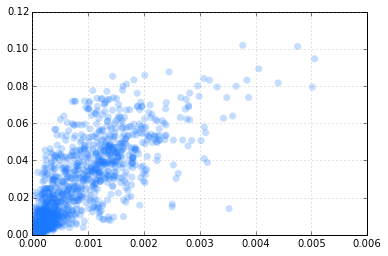

In [27]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='white'))

scatter = ax.scatter(ft.feature_importance,ft.feature_distance,
                    s = 50, alpha = 0.25, edgecolors = 'none', c = '#1B79FF')

ax.set_xlim([0, 0.006])
ax.set_ylim([0, 0.12])

ax.grid(color='#909090', linestyle='dotted')

labels = list(ft.candidate_feature)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.enable_notebook()